In [1]:
#import data and calculate standard score
import numpy as np
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
features=np.concatenate((x_train,x_test),axis=0).reshape(60000,-1)
labels=np.concatenate((y_train,y_test),axis=0).reshape(1,-1)[0].tolist()
features=features.astype('float')
features -= np.mean(features, axis=0)
features /= np.std(features, axis=0)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=80).fit(features)
features_PCA=pca.transform(features)

In [3]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
def cal_accurancy(train_features,train_labels,test_features,test_labels):
    rf = RandomForestClassifier(warm_start=True, n_estimators=550, max_features='sqrt')
    rf_model = rf.fit(train_features,train_labels)
    result=rf.predict(test_features)
    n=0
    for j in range(6000):
        confusion[result[j]][test_labels[j]]+=1
        if(result[j]==test_labels[j]):
            n=n+1
            
    for i in range(10):
        for j in range(6000):
            if(result[j]==i and test_labels[j]==i):
                TP[i]+=1
            if(result[j]==i and test_labels[j]!=i):
                FP[i]+=1
            if(result[j]!=i and test_labels[j]==i):
                FN[i]+=1
            if(result[j]!=i and test_labels[j]!=i):
                TN[i]+=1
    
    return n/6000

In [4]:
#10-fold cross validation
TP=np.zeros(10)
FP=np.zeros(10)
TN=np.zeros(10)
FN=np.zeros(10)
Accuracy=np.zeros(10)
Precision=np.zeros(10)
Recall=np.zeros(10)
F1_Score=np.zeros(10)
confusion=np.zeros((10,10))
acc=[]
for i in range(10):
    train_features=np.concatenate((features_PCA[0:i*6000], features_PCA[(i+1)*6000:]), axis=0)    
    train_labels=labels[0:i*6000]+labels[(i+1)*6000:]
    test_features=features_PCA[i*6000:(i+1)*6000]
    test_labels=labels[i*6000:(i+1)*6000]
    acc.append(cal_accurancy(train_features,train_labels,test_features,test_labels))
    
print(sum(acc)/10)
for i in range(10):
    Accuracy[i]=(TP[i]+TN[i])/(TP[i]+TN[i]+FN[i]+FP[i])
    Precision[i] = TP[i]/(TP[i]+FP[i])
    Recall[i] = TP[i]/(TP[i]+FN[i])
    F1_Score[i] = 2*(Recall[i] * Precision[i]) / (Recall[i] + Precision[i])

0.5019166666666666


In [5]:
print(Accuracy)
print(Precision)
print(Recall)
print(F1_Score)

[0.91443333 0.91288333 0.89273333 0.87935    0.89481667 0.88738333
 0.89785    0.91268333 0.91661667 0.89508333]
[0.5735394  0.55719994 0.45049955 0.37292308 0.47152536 0.43320981
 0.49134344 0.57100205 0.57211052 0.47958478]
[0.56283333 0.6275     0.33066667 0.303      0.42916667 0.40916667
 0.61016667 0.51       0.65916667 0.5775    ]
[0.56813594 0.59026417 0.38139177 0.33434483 0.44934997 0.42084512
 0.54434615 0.53877982 0.61256099 0.52400756]


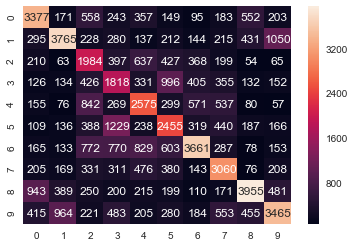

In [8]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion, range(10),range(10))
df_cm= df_cm.astype(int)
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True, fmt='d')# font size

In [7]:
confusion

array([[3377.,  171.,  558.,  243.,  357.,  149.,   95.,  183.,  552.,
         203.],
       [ 295., 3765.,  228.,  280.,  137.,  212.,  144.,  215.,  431.,
        1050.],
       [ 210.,   63., 1984.,  397.,  637.,  427.,  368.,  199.,   54.,
          65.],
       [ 126.,  134.,  426., 1818.,  331.,  996.,  405.,  355.,  132.,
         152.],
       [ 155.,   76.,  842.,  269., 2575.,  299.,  571.,  537.,   80.,
          57.],
       [ 109.,  136.,  388., 1229.,  238., 2455.,  319.,  440.,  187.,
         166.],
       [ 165.,  133.,  772.,  770.,  829.,  603., 3661.,  287.,   78.,
         153.],
       [ 205.,  169.,  331.,  311.,  476.,  380.,  143., 3060.,   76.,
         208.],
       [ 943.,  389.,  250.,  200.,  215.,  199.,  110.,  171., 3955.,
         481.],
       [ 415.,  964.,  221.,  483.,  205.,  280.,  184.,  553.,  455.,
        3465.]])